### Training neural networks

We will work on three replicates of our dataset : \
    - data - the whole dataset partially preprocessed \
    - manually_selected_data - manually selected features, partially preprocessed \
    - automatically_selected_data - automatically selected features, partially preprocessed

Let's read our datasets

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def load_data(filename, FOLDER="./data"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path)

In [3]:
data = load_data("preprocessed_data.csv")
display(data.head())

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customming_years,Age
0,Graduation,Single,0.357999,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.792683
1,Graduation,Single,0.285375,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.829268
2,Graduation,Together,0.440975,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0,0.666667,0.695122
3,Graduation,Together,0.164079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.463415
4,PhD,Married,0.358954,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0,0.333333,0.500000


In [4]:
manually_selected_data = load_data("manually_selected_data.csv")
display(manually_selected_data.head())

,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,Income,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Customming_years,Response
0,0.0,0.0,0.585859,0.425318,0.316522,0.357999,0.357143,0.0,0.0,0.0,0.0,1.000000,1
1,0.5,0.5,0.383838,0.007368,0.003478,0.285375,0.035714,0.0,0.0,0.0,0.0,0.333333,0
2,0.0,0.0,0.262626,0.285332,0.073623,0.440975,0.071429,0.0,0.0,0.0,0.0,0.666667,0
3,0.5,0.0,0.262626,0.007368,0.011594,0.164079,0.000000,0.0,0.0,0.0,0.0,0.333333,0
4,0.5,0.0,0.949495,0.115874,0.068406,0.358954,0.107143,0.0,0.0,0.0,0.0,0.333333,0


In [5]:
atomatically_selected_data = load_data("atomatically_selected_data.csv")
display(atomatically_selected_data.head())

,Recency,MntMeatProducts,Income,MntWines,MntGoldProds,AcceptedCmp5,Age,AcceptedCmp3,MntFishProducts,MntSweetProducts,MntFruits,NumWebVisitsMonth,NumCatalogPurchases,Response
0,0.585859,0.316522,0.357999,0.425318,0.243094,0.0,0.792683,0.0,0.664093,0.334601,0.442211,0.35,0.357143,1
1,0.383838,0.003478,0.285375,0.007368,0.016575,0.0,0.829268,0.0,0.007722,0.003802,0.005025,0.25,0.035714,0
2,0.262626,0.073623,0.440975,0.285332,0.116022,0.0,0.695122,0.0,0.428571,0.079848,0.246231,0.20,0.071429,0
3,0.262626,0.011594,0.164079,0.007368,0.013812,0.0,0.463415,0.0,0.038610,0.011407,0.020101,0.30,0.000000,0
4,0.949495,0.068406,0.358954,0.115874,0.041436,0.0,0.500000,0.0,0.177606,0.102662,0.216080,0.25,0.107143,0


Let's devide columns to numeric and categorical for all 3 datasets

In [6]:
data_numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
manual_data_numerical_columns = manually_selected_data.select_dtypes(include=np.number).columns.tolist()
atomatical_data_numerical_columns = atomatically_selected_data.select_dtypes(include=np.number).columns.tolist()

data_categorical_columns = ['Education', 'Marital_Status']

data_numerical_columns.remove('Response')
manual_data_numerical_columns.remove('Response')
atomatical_data_numerical_columns.remove('Response')

#### Let's create data frame selector

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

We will define preprocessing with special pipelines for numerical and categorical values

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion

data_num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(data_numerical_columns)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

data_cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(data_categorical_columns)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

data_preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", data_num_pipeline),
        ("cat_pipeline", data_cat_pipeline),
    ])

manual_preprocess_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(manual_data_numerical_columns)),
         ("imputer", SimpleImputer(strategy="median")),
    ])

atomatic_preprocess_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(atomatical_data_numerical_columns)),
         ("imputer", SimpleImputer(strategy="median")),
    ])

### Devide our dataset for data and target

In [9]:
X_data = data.drop(['Response'], axis=1)
X_manual = manually_selected_data.drop(['Response'], axis=1)
X_atomatic = atomatically_selected_data.drop(['Response'], axis=1)

y_data = data['Response'].values
y_manual = manually_selected_data['Response'].values
y_atomatic = atomatically_selected_data['Response'].values

### Devide our dataset for test and train sets

In [10]:
from sklearn.model_selection import train_test_split

X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 50)
X_manual_train, X_manual_test, y_manual_train, y_manual_test = \
            train_test_split(X_manual, y_manual, test_size = 0.4, random_state = 50)
X_atomatic_train, X_atomatic_test, y_atomatic_train, y_atomatic_test = \
            train_test_split(X_atomatic, y_atomatic, test_size = 0.4, random_state = 50)

In [11]:
data_cat_pipeline.fit_transform(X_data_train)
data_num_pipeline.fit_transform(X_data_train)

manual_preprocess_pipeline.fit_transform(X_manual_train)
atomatic_preprocess_pipeline.fit_transform(X_atomatic_train)

array([[0.94949495, 0.01681159, 0.29488845, ..., 0.        , 0.25      ,
        0.        ],
       [0.2020202 , 0.00173913, 0.25336059, ..., 0.        , 0.15      ,
        0.        ],
       [0.48484848, 0.00115942, 0.21303349, ..., 0.        , 0.4       ,
        0.        ],
       ...,
       [0.50505051, 0.10724638, 0.46739164, ..., 0.54271357, 0.15      ,
        0.21428571],
       [0.88888889, 0.10956522, 0.28801025, ..., 0.52261307, 0.4       ,
        0.28571429],
       [0.68686869, 0.08173913, 0.21672814, ..., 0.06030151, 0.4       ,
        0.03571429]])

### Sieci neuronowe 

In [12]:
X_data_train = data_preprocess_pipeline.transform(X_data_train)
X_data_test = data_preprocess_pipeline.transform(X_data_test)

In [13]:
X_manual_train = manual_preprocess_pipeline.transform(X_manual_train)
X_manual_test = manual_preprocess_pipeline.transform(X_manual_test)

In [14]:
X_atomatic_train = atomatic_preprocess_pipeline.transform(X_atomatic_train)
X_atomatic_test = atomatic_preprocess_pipeline.transform(X_atomatic_test)

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [16]:
model_1_data = keras.Sequential([
              Dense(25, activation='relu', name="input_layer", input_shape=(X_data_train.shape[1], )),
              Dense(5, activation='relu', name="1nd_layer"),
#               Dense(20, activation='relu', name="2nd_layer"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_1_data")

model_1_manual = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_manual_train.shape[1], )),
              Dense(50, activation='relu', name="1nd_layer"),
              Dense(20, activation='relu', name="2nd_layer"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_1_manual")

model_1_atomatic = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_atomatic_train.shape[1], )),
              Dense(50, activation='relu', name="1nd_layer"),
              Dense(20, activation='relu', name="2nd_layer"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_1_atomatic")



model_1_data.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

model_1_manual.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

model_1_atomatic.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

In [17]:
history_1_data = model_1_data.fit(X_data_train, y_data_train, 
                      epochs=20, 
                      batch_size=64, 
                      validation_data=(X_data_test, y_data_test),
                      verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 15ms/step - loss: 0.6711 - accuracy: 0.5521 - recall: 0.4897 - precision: 0.1710 - val_loss: 0.6013 - val_accuracy: 0.8674 - val_recall: 0.0330 - val_precision: 0.7500
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.8454 - recall: 0.0041 - precision: 1.0000 - val_loss: 0.4779 - val_accuracy: 0.8644 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4614 - accuracy: 0.8447 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.4114 - val_accuracy: 0.8644 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.8447 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3818 - val_accuracy: 0.8644 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss:

In [18]:
history_1_manual = model_1_manual.fit(X_manual_train, y_manual_train, 
                      epochs=20, 
                      batch_size=64, 
                      validation_data=(X_manual_test, y_manual_test),
                      verbose=1)

Epoch 1/20
21/21 [==============================] - 1s 15ms/step - loss: 0.5354 - accuracy: 0.8434 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 0.4243 - val_accuracy: 0.8615 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 2/20
21/21 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8434 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 0.3701 - val_accuracy: 0.8615 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 0.3801 - accuracy: 0.8449 - recall_1: 0.0143 - precision_1: 0.7500 - val_loss: 0.3320 - val_accuracy: 0.8715 - val_recall_1: 0.0968 - val_precision_1: 0.8000
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 0.3542 - accuracy: 0.8643 - recall_1: 0.1619 - precision_1: 0.8500 - val_loss: 0.3092 - val_accuracy: 0.8793 - val_recall_1: 0.1774 - val_precision_1: 0.7857
Epoch 5/20
21/21 [=============================

In [19]:
history_1_atomatic = model_1_atomatic.fit(X_atomatic_train, y_atomatic_train, 
                      epochs=20, 
                      batch_size=32, 
                      validation_data=(X_atomatic_test, y_atomatic_test),
                      verbose=1)

Epoch 1/20
42/42 [==============================] - 1s 9ms/step - loss: 0.5853 - accuracy: 0.7703 - recall_2: 0.1048 - precision_2: 0.1549 - val_loss: 0.4215 - val_accuracy: 0.8615 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00
Epoch 2/20
42/42 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8449 - recall_2: 0.0143 - precision_2: 0.7500 - val_loss: 0.3293 - val_accuracy: 0.8760 - val_recall_2: 0.1290 - val_precision_2: 0.8421
Epoch 3/20
42/42 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8658 - recall_2: 0.2476 - precision_2: 0.7027 - val_loss: 0.3132 - val_accuracy: 0.8760 - val_recall_2: 0.2419 - val_precision_2: 0.6383
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: 0.3473 - accuracy: 0.8665 - recall_2: 0.3190 - precision_2: 0.6505 - val_loss: 0.3119 - val_accuracy: 0.8771 - val_recall_2: 0.2177 - val_precision_2: 0.6750
Epoch 5/20
42/42 [==============================] - 0s 5ms/step - loss: 

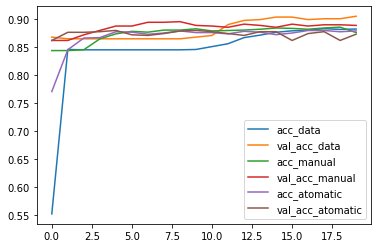

In [20]:
plt.plot(pd.DataFrame(history_1_data.history['accuracy']), label='acc_data')
plt.plot(pd.DataFrame(history_1_data.history['val_accuracy']), label='val_acc_data')
plt.plot(pd.DataFrame(history_1_manual.history['accuracy']), label='acc_manual')
plt.plot(pd.DataFrame(history_1_manual.history['val_accuracy']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_1_atomatic.history['accuracy']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_1_atomatic.history['val_accuracy']), label='val_acc_atomatic')

plt.legend()
plt.show()

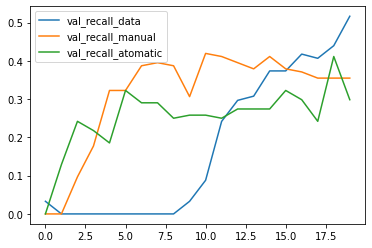

In [21]:
plt.plot(pd.DataFrame(history_1_data.history['val_recall']), label='val_recall_data')
plt.plot(pd.DataFrame(history_1_manual.history['val_recall_1']), label='val_recall_manual')
plt.plot(pd.DataFrame(history_1_atomatic.history['val_recall_2']), label='val_recall_atomatic')

plt.legend()
plt.show()

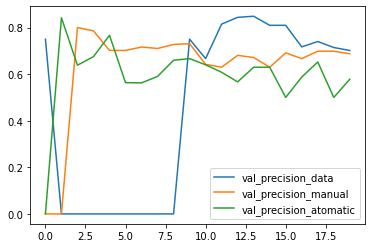

In [22]:
plt.plot(pd.DataFrame(history_1_data.history['val_precision']), label='val_precision_data')
plt.plot(pd.DataFrame(history_1_manual.history['val_precision_1']), label='val_precision_manual')
plt.plot(pd.DataFrame(history_1_atomatic.history['val_precision_2']), label='val_precision_atomatic')

plt.legend()
plt.show()

In [23]:
model_2_data = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_data_train.shape[1], )),
              Dropout(0.2),
              Dense(50, activation='relu', name="1nd_layer"),
              Dropout(0.2),
              Dense(20, activation='relu', name="2nd_layer"),
              Dropout(0.2),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_2_data")

model_2_manual = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_manual_train.shape[1], )),
              Dropout(0.2),
              Dense(50, activation='relu', name="1nd_layer"),
              Dropout(0.2),
              Dense(20, activation='relu', name="2nd_layer"),
              Dropout(0.2),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_2_manual")

model_2_atomatic = keras.Sequential([
              Dense(75, activation='relu', name="input_layer", input_shape=(X_atomatic_train.shape[1], )),
              Dropout(0.2),
              Dense(50, activation='relu', name="1nd_layer"),
              Dropout(0.2),
              Dense(20, activation='relu', name="2nd_layer"),
              Dropout(0.2),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_2_atomatic")


model_2_data.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

model_2_manual.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

model_2_atomatic.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])


In [24]:
history_2_data = model_2_data.fit(X_data_train, y_data_train, 
                      epochs=20, 
                      batch_size=32, 
                      validation_data=(X_data_test, y_data_test),
                      verbose=1)

Epoch 1/20
49/49 [==============================] - 1s 8ms/step - loss: 0.5205 - accuracy: 0.8070 - recall_3: 0.0370 - precision_3: 0.1169 - val_loss: 0.3832 - val_accuracy: 0.8644 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00
Epoch 2/20
49/49 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8447 - recall_3: 0.0000e+00 - precision_3: 0.0000e+00 - val_loss: 0.3255 - val_accuracy: 0.8644 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00
Epoch 3/20
49/49 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8473 - recall_3: 0.0165 - precision_3: 1.0000 - val_loss: 0.2923 - val_accuracy: 0.8733 - val_recall_3: 0.0879 - val_precision_3: 0.8000
Epoch 4/20
49/49 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.8581 - recall_3: 0.1070 - precision_3: 0.8387 - val_loss: 0.2671 - val_accuracy: 0.9001 - val_recall_3: 0.3846 - val_precision_3: 0.7609
Epoch 5/20
49/49 [==============================] - 0s 2

In [25]:
history_2_manual = model_2_manual.fit(X_manual_train, y_manual_train, 
                      epochs=20, 
                      batch_size=32, 
                      validation_data=(X_manual_test, y_manual_test),
                      verbose=1)

Epoch 1/20
42/42 [==============================] - 1s 9ms/step - loss: 0.5150 - accuracy: 0.8412 - recall_4: 0.0000e+00 - precision_4: 0.0000e+00 - val_loss: 0.4110 - val_accuracy: 0.8615 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8434 - recall_4: 0.0000e+00 - precision_4: 0.0000e+00 - val_loss: 0.3348 - val_accuracy: 0.8615 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8553 - recall_4: 0.0857 - precision_4: 0.9000 - val_loss: 0.3020 - val_accuracy: 0.8827 - val_recall_4: 0.2097 - val_precision_4: 0.7879
Epoch 4/20
42/42 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8643 - recall_4: 0.2190 - precision_4: 0.7188 - val_loss: 0.2904 - val_accuracy: 0.8916 - val_recall_4: 0.3710 - val_precision_4: 0.7077
Epoch 5/20
42/42 [==============================

In [26]:
history_2_atomatic = model_2_atomatic.fit(X_atomatic_train, y_atomatic_train, 
                      epochs=20, 
                      batch_size=32, 
                      validation_data=(X_atomatic_test, y_atomatic_test),
                      verbose=1)

Epoch 1/20
42/42 [==============================] - 2s 9ms/step - loss: 0.5009 - accuracy: 0.8404 - recall_5: 0.0095 - precision_5: 0.2500 - val_loss: 0.3961 - val_accuracy: 0.8615 - val_recall_5: 0.0000e+00 - val_precision_5: 0.0000e+00
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8464 - recall_5: 0.0190 - precision_5: 1.0000 - val_loss: 0.3400 - val_accuracy: 0.8726 - val_recall_5: 0.1048 - val_precision_5: 0.8125
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 0.8553 - recall_5: 0.1190 - precision_5: 0.7353 - val_loss: 0.3167 - val_accuracy: 0.8760 - val_recall_5: 0.2419 - val_precision_5: 0.6383
Epoch 4/20
42/42 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8650 - recall_5: 0.2810 - precision_5: 0.6629 - val_loss: 0.3111 - val_accuracy: 0.8749 - val_recall_5: 0.3145 - val_precision_5: 0.5909
Epoch 5/20
42/42 [==============================] - 0s 3ms/step - loss: 

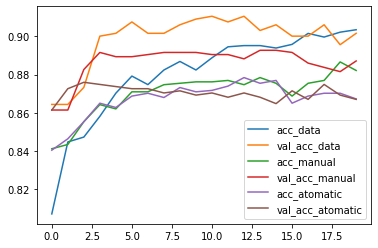

In [27]:
plt.plot(pd.DataFrame(history_2_data.history['accuracy']), label='acc_data')
plt.plot(pd.DataFrame(history_2_data.history['val_accuracy']), label='val_acc_data')
plt.plot(pd.DataFrame(history_2_manual.history['accuracy']), label='acc_manual')
plt.plot(pd.DataFrame(history_2_manual.history['val_accuracy']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_2_atomatic.history['accuracy']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_2_atomatic.history['val_accuracy']), label='val_acc_atomatic')

plt.legend()
plt.show()

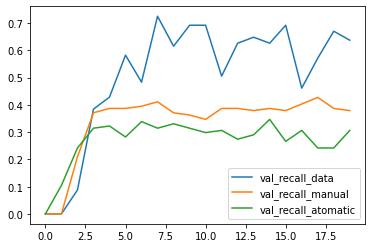

In [28]:
plt.plot(pd.DataFrame(history_2_data.history['val_recall_3']), label='val_recall_data')
plt.plot(pd.DataFrame(history_2_manual.history['val_recall_4']), label='val_recall_manual')
plt.plot(pd.DataFrame(history_2_atomatic.history['val_recall_5']), label='val_recall_atomatic')

plt.legend()
plt.show()

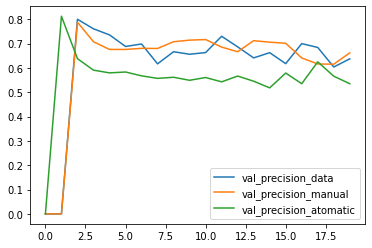

In [29]:
plt.plot(pd.DataFrame(history_2_data.history['val_precision_3']), label='val_precision_data')
plt.plot(pd.DataFrame(history_2_manual.history['val_precision_4']), label='val_precision_manual')
plt.plot(pd.DataFrame(history_2_atomatic.history['val_precision_5']), label='val_precision_atomatic')

plt.legend()
plt.show()

In [30]:
model_3_data = keras.Sequential([
              Dense(75, use_bias=False, name="input_layer", input_shape=(X_data_train.shape[1], )),
              BatchNormalization(),
              Activation("relu"),
              Dense(50, use_bias=False, name="1nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(20, use_bias=False, name="2nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_3_data")

model_3_manual = keras.Sequential([
              Dense(75, use_bias=False, name="input_layer", input_shape=(X_manual_train.shape[1], )),
              BatchNormalization(),
              Activation("relu"),
              Dense(50, use_bias=False, name="1nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(20, use_bias=False, name="2nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_3_manual")

model_3_atomatic = keras.Sequential([
              Dense(75, use_bias=False, name="input_layer", input_shape=(X_atomatic_train.shape[1], )),
              BatchNormalization(),
              Activation("relu"),
              Dense(50, use_bias=False, name="1nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(20, use_bias=False, name="2nd_layer"),
              BatchNormalization(),
              Activation("relu"),
              Dense(1, activation='sigmoid', name="output_layer")
], name="model_3_atomatic")

model_3_data.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])
model_3_manual.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])
model_3_atomatic.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

In [31]:
history_3_data = model_3_data.fit(X_data_train, y_data_train, 
                      epochs=20, 
                      batch_size=32, 
                      validation_data=(X_data_test, y_data_test),
                      verbose=1)

Epoch 1/20
49/49 [==============================] - 3s 11ms/step - loss: 0.8006 - accuracy: 0.4850 - recall_6: 0.8519 - precision_6: 0.2119 - val_loss: 0.6592 - val_accuracy: 0.8152 - val_recall_6: 0.5824 - val_precision_6: 0.3813
Epoch 2/20
49/49 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7923 - recall_6: 0.7119 - precision_6: 0.4042 - val_loss: 0.5687 - val_accuracy: 0.8897 - val_recall_6: 0.4396 - val_precision_6: 0.6349
Epoch 3/20
49/49 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.8562 - recall_6: 0.6008 - precision_6: 0.5328 - val_loss: 0.4704 - val_accuracy: 0.8972 - val_recall_6: 0.3846 - val_precision_6: 0.7292
Epoch 4/20
49/49 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8843 - recall_6: 0.5720 - precision_6: 0.6435 - val_loss: 0.3915 - val_accuracy: 0.9016 - val_recall_6: 0.3626 - val_precision_6: 0.8049
Epoch 5/20
49/49 [==============================] - 0s 3ms/step - loss: 0.2957 

In [32]:
history_3_manual = model_3_manual.fit(X_manual_train, y_manual_train, 
                      epochs=20, 
                      batch_size=32, 
                      validation_data=(X_manual_test, y_manual_test),
                      verbose=1)

Epoch 1/20
42/42 [==============================] - 3s 22ms/step - loss: 0.8990 - accuracy: 0.2960 - recall_7: 0.9571 - precision_7: 0.1769 - val_loss: 0.6864 - val_accuracy: 0.6413 - val_recall_7: 0.7903 - val_precision_7: 0.2494
Epoch 2/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6460 - accuracy: 0.7136 - recall_7: 0.7952 - precision_7: 0.3287 - val_loss: 0.5974 - val_accuracy: 0.8771 - val_recall_7: 0.3790 - val_precision_7: 0.5875
Epoch 3/20
42/42 [==============================] - 0s 6ms/step - loss: 0.5126 - accuracy: 0.8158 - recall_7: 0.6381 - precision_7: 0.4393 - val_loss: 0.5083 - val_accuracy: 0.8793 - val_recall_7: 0.2581 - val_precision_7: 0.6667
Epoch 4/20
42/42 [==============================] - 0s 5ms/step - loss: 0.4371 - accuracy: 0.8464 - recall_7: 0.5762 - precision_7: 0.5084 - val_loss: 0.4224 - val_accuracy: 0.8816 - val_recall_7: 0.2419 - val_precision_7: 0.7143
Epoch 5/20
42/42 [==============================] - 0s 3ms/step - loss: 0.3837 

In [33]:
history_3_atomatic = model_3_atomatic.fit(X_atomatic_train, y_atomatic_train, 
                      epochs=20, 
                      batch_size=32, 
                      validation_data=(X_atomatic_test, y_atomatic_test),
                      verbose=1)

Epoch 1/20
42/42 [==============================] - 2s 20ms/step - loss: 0.5763 - accuracy: 0.7457 - recall_8: 0.3857 - precision_8: 0.2765 - val_loss: 0.6362 - val_accuracy: 0.8682 - val_recall_8: 0.1532 - val_precision_8: 0.5938
Epoch 2/20
42/42 [==============================] - 0s 6ms/step - loss: 0.4236 - accuracy: 0.8523 - recall_8: 0.4048 - precision_8: 0.5380 - val_loss: 0.5276 - val_accuracy: 0.8615 - val_recall_8: 0.0081 - val_precision_8: 0.5000
Epoch 3/20
42/42 [==============================] - 0s 6ms/step - loss: 0.3712 - accuracy: 0.8635 - recall_8: 0.3333 - precision_8: 0.6195 - val_loss: 0.4296 - val_accuracy: 0.8615 - val_recall_8: 0.0081 - val_precision_8: 0.5000
Epoch 4/20
42/42 [==============================] - 0s 6ms/step - loss: 0.3417 - accuracy: 0.8695 - recall_8: 0.3857 - precision_8: 0.6378 - val_loss: 0.3711 - val_accuracy: 0.8603 - val_recall_8: 0.0000e+00 - val_precision_8: 0.0000e+00
Epoch 5/20
42/42 [==============================] - 0s 6ms/step - loss:

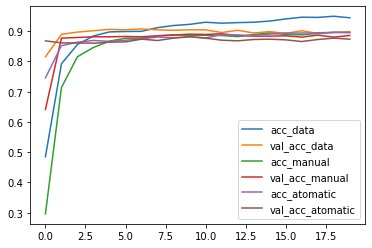

In [34]:
plt.plot(pd.DataFrame(history_3_data.history['accuracy']), label='acc_data')
plt.plot(pd.DataFrame(history_3_data.history['val_accuracy']), label='val_acc_data')
plt.plot(pd.DataFrame(history_3_manual.history['accuracy']), label='acc_manual')
plt.plot(pd.DataFrame(history_3_manual.history['val_accuracy']), label='val_acc_manual')
plt.plot(pd.DataFrame(history_3_atomatic.history['accuracy']), label='acc_atomatic')
plt.plot(pd.DataFrame(history_3_atomatic.history['val_accuracy']), label='val_acc_atomatic')

plt.legend()
plt.show()

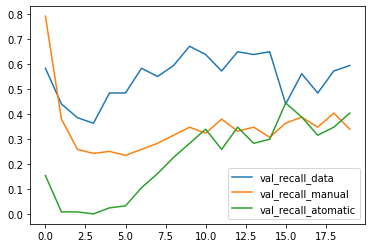

In [35]:
plt.plot(pd.DataFrame(history_3_data.history['val_recall_6']), label='val_recall_data')
plt.plot(pd.DataFrame(history_3_manual.history['val_recall_7']), label='val_recall_manual')
plt.plot(pd.DataFrame(history_3_atomatic.history['val_recall_8']), label='val_recall_atomatic')

plt.legend()
plt.show()

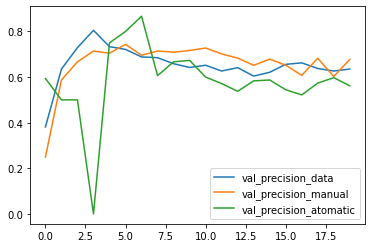

In [36]:
plt.plot(pd.DataFrame(history_3_data.history['val_precision_6']), label='val_precision_data')
plt.plot(pd.DataFrame(history_3_manual.history['val_precision_7']), label='val_precision_manual')
plt.plot(pd.DataFrame(history_3_atomatic.history['val_precision_8']), label='val_precision_atomatic')

plt.legend()
plt.show()